# Trainingdata Vader without stopword cleaning

In [1]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to create stat and visualize data
import matplotlib as mpl # to visualize data
import seaborn as sns # to visualize data
from sklearn.metrics import * # calculation of metrics for validation purposes 
import nltk # importing nltk            
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # importing vader classifier

setting to show full text content

In [2]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [3]:
df_vader_with_stopwords = pd.read_csv('../../Data-Preparation/sentiment140/traindata_with_stopwords_preprocessed.csv')

In [4]:
df_vader_with_stopwords['target'].value_counts()

target
0    486400
4    486400
Name: count, dtype: int64

## Classifying sentiments 

SentimentIntensityAnalyzer gets imported that containes a pre-defined ruleset for sentiment analyzation. A sentiment score gets calculated from that and the value 0.00 is chosen to differ between positive and negative sentiment.

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [6]:
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.00:
        return 'positive'
    else: 
        return 'negative'

In [7]:
df_vader_with_stopwords['VADER_Classification'] = df_vader_with_stopwords['Text'].apply(classify_sentiment)

In [ ]:
df_vader_with_stopwords

,Text,Ground_Truth_Label,target,VADER_Classification
0,@ddlovato wow Not wise of your fear of the elevators incredible! i love you demi !,negative,0,positive
1,"@rimamelati hahaha! i'm so so bored. what are you doing? haha, the plane crash is so so scary",negative,0,negative
2,"@BrendaSanDiego Sure, i'm following you now",positive,4,positive
3,"@yum9me does your itunes say that you can download OS3 yet, because mine says my OS is up to date",negative,0,positive
4,@PetiteAntoin my mom's French Mauritian and I can't speak French Good luck learning it,negative,0,positive
...,...,...,...,...
972795,@yelyahwilliams I asked 400 of the staff at ACC to bring my cd back to get signed but they all said no Please Please sign my cd for me?,negative,0,negative
972796,@arosefull love it. i am a sucker for the romantic comedy. when harry met sally is my favorite movie.,positive,4,positive
972797,@LisaWorld thx for the props &amp; u have a new listener â« http://blip.fm/~7quc9,positive,4,positive
972798,"@ddlovato yesterday &quot;sonny with a chance&quot; came to brazil, i loved it!! you're amazing &lt;33 please reply",negative,0,positive


## Testing quality of the classifier on training data

In [ ]:
accuracy = accuracy_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'])
precision = precision_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')
recall = recall_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')
f1 = f1_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')


beta = 1 / (2**0.5)
f_beta = fbeta_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'],beta=beta, pos_label='positive')

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.66
Precision: 0.61
Recall: 0.90
F1 Score: 0.73
F-beta Score (beta=0.7071067811865475): 0.6850835990624639


In [ ]:
print("\nClassification Report:\n")
print(classification_report(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.81      0.43      0.56    486400
    positive       0.61      0.90      0.73    486400

    accuracy                           0.66    972800
   macro avg       0.71      0.66      0.65    972800
weighted avg       0.71      0.66      0.65    972800



creating heatmap to visualize false positives and false negatives

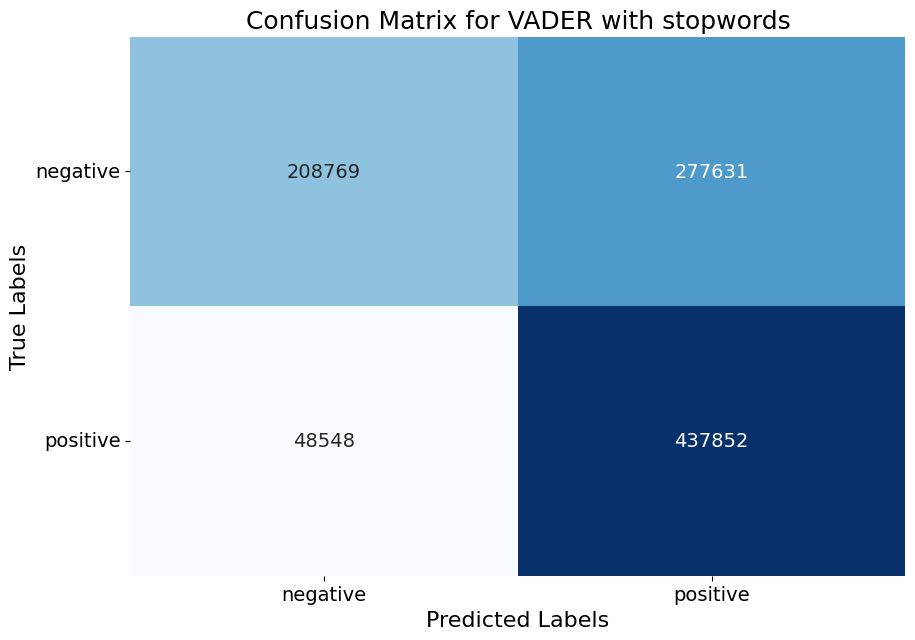

In [ ]:
cm_nb = confusion_matrix(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for VADER with stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()